In [20]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime 
import os
import re
import plotly.express as px

import matplotlib.pyplot as plt

# Preperation

## Argentina

In [72]:
#   Argentina prep
argentina = pd.read_csv('./data/argentina-inflation-raw.csv')

argentina.head()

,Date,Rate
0,01/31/1970,6.5
1,02/28/1970,9.5
2,03/31/1970,9.6
3,04/30/1970,10.4
4,05/31/1970,12.7


In [73]:
#   Parse year
argentina["year"] = pd.to_datetime(argentina["Date"], format = '%m/%d/%Y').dt.year

argentina.head()

,Date,Rate,year
0,01/31/1970,6.5,1970
1,02/28/1970,9.5,1970
2,03/31/1970,9.6,1970
3,04/30/1970,10.4,1970
4,05/31/1970,12.7,1970


In [76]:
#   Aggregate inflation per year via arithmetic average
ag_inf1 = argentina[["year","Rate"]]

#   First, identify which strings in this column have weird formatting
for index, row in ag_inf1["Rate"].items():
    print(f"{index}: {row}")


0: 6.5
1: 9.5
2: 9.6
3: 10.4
4: 12.7
5: 12.5
6: 12.3
7: 14.5
8: 14.7
9: 17.4
10: 19.6
11: 21.7
12: 27.4
13: 29.9
14: 29.6
15: 29.8
16: 31.9
17: 35.1
18: 39.2
19: 41.2
20: 39.6
21: 35.7
22: 35.9
23: 39.1
24: 46.8
25: 47.2
26: 51.8
27: 57.8
28: 56.5
29: 60.1
30: 61.2
31: 56.8
32: 59.2
33: 65.2
34: 68.7
35: 64.1
36: 63.2
37: 69.5
38: 76.5
39: 75.9
40: 79.1
41: 64.8
42: 56.9
43: 58.4
44: 55.4
45: 50.5
46: 44.7
47: 43.8
48: 29.6
49: 22.3
50: 14
51: 12.2
52: 12.1
53: 19.9
54: 22.6
55: 23.9
56: 27.4
57: 30.2
58: 34.5
59: 40.1
60: 52.9
61: 57.5
62: 68.3
63: 79.5
64: 80.5
65: 110.5
66: 177.3
67: 233.4
68: 257.7
69: 292.2
70: 310.3
71: 335
72: 360.4
73: 423.6
74: 566.3
75: 713.4
76: 777.6
77: 644.3
78: 475.8
79: 396.1
80: 395
81: 371.8
82: 367.4
83: 347.5
84: 344
85: 303.9
86: 215.8
87: 150
88: 137.5
89: 148.9
90: 156.3
91: 170.4
92: 164.9
93: 174.7
94: 177.5
95: 160.4
96: 173.3
97: 168.1
98: 172.9
99: 186
100: 191.9
101: 188.7
102: 186.7
103: 177.6
104: 172.7
105: 166.1
106: 165.5
107: 169.8
10

Weird formatting has additional decimal point. Simply remove with regex.

In [86]:
#   replace secondary decimal point
ag_inf2 = ag_inf1.copy()
ag_inf2["Rate"] = ag_inf2["Rate"].str.replace(r'(\d+\.)(\d+)\.(\d+)', r'\1\2\3')

for index, row in ag_inf2["Rate"].items():
    # print(f"{index}: {row}")

    print(f"{index}: | Old: {ag_inf1['Rate'][index]} | New: {row}")

0: | Old: 6.5 | New: 6.5
1: | Old: 9.5 | New: 9.5
2: | Old: 9.6 | New: 9.6
3: | Old: 10.4 | New: 10.4
4: | Old: 12.7 | New: 12.7
5: | Old: 12.5 | New: 12.5
6: | Old: 12.3 | New: 12.3
7: | Old: 14.5 | New: 14.5
8: | Old: 14.7 | New: 14.7
9: | Old: 17.4 | New: 17.4
10: | Old: 19.6 | New: 19.6
11: | Old: 21.7 | New: 21.7
12: | Old: 27.4 | New: 27.4
13: | Old: 29.9 | New: 29.9
14: | Old: 29.6 | New: 29.6
15: | Old: 29.8 | New: 29.8
16: | Old: 31.9 | New: 31.9
17: | Old: 35.1 | New: 35.1
18: | Old: 39.2 | New: 39.2
19: | Old: 41.2 | New: 41.2
20: | Old: 39.6 | New: 39.6
21: | Old: 35.7 | New: 35.7
22: | Old: 35.9 | New: 35.9
23: | Old: 39.1 | New: 39.1
24: | Old: 46.8 | New: 46.8
25: | Old: 47.2 | New: 47.2
26: | Old: 51.8 | New: 51.8
27: | Old: 57.8 | New: 57.8
28: | Old: 56.5 | New: 56.5
29: | Old: 60.1 | New: 60.1
30: | Old: 61.2 | New: 61.2
31: | Old: 56.8 | New: 56.8
32: | Old: 59.2 | New: 59.2
33: | Old: 65.2 | New: 65.2
34: | Old: 68.7 | New: 68.7
35: | Old: 64.1 | New: 64.1
36: | Ol

Should be running smooth now.

In [94]:
# Aggegate per year
ag_inf2["Rate"] = ag_inf2["Rate"].astype(float)

ag_inflation = ag_inf2.groupby(by = "year", as_index = False).mean()

#   Rename 
ag_inflation.rename(columns = {"Rate":"Inflation, consumer prices (annual %)"}, inplace = True)

ag_inflation.head()

,year,"Inflation, consumer prices (annual %)"
0,1970,13.450000
1,1971,34.533333
2,1972,57.950000
3,1973,61.558333
4,1974,24.066667


## Australia, Brazil, and Lebanon

In [95]:
#   Australia
audf = pd.read_csv("./data/australia.csv")

au_inflation = audf[["year", "Inflation, consumer prices (annual %)"]]
au_inflation

,year,"Inflation, consumer prices (annual %)"
0,1960,3.728814
1,1961,2.287582
2,1962,-0.319489
3,1963,0.641026
4,1964,2.866242
...,...,...
58,2018,1.911401
59,2019,1.610768
60,2020,0.846905
61,2021,2.863910


In [99]:
brdf = pd.read_csv('./data/brazil.csv')

br_inflation = brdf[["year", "Inflation, consumer prices (annual %)"]]
br_inflation

,year,"Inflation, consumer prices (annual %)"
0,1960,NaN
1,1961,NaN
2,1962,NaN
3,1963,NaN
4,1964,NaN
...,...,...
58,2018,3.664850
59,2019,3.732976
60,2020,3.211768
61,2021,8.301660


In [100]:
lbdf = pd.read_csv('./data/lebanon.csv')

lb_inflation = lbdf[["year", "Inflation, consumer prices (annual %)"]]
lb_inflation

,year,"Inflation, consumer prices (annual %)"
0,1960,NaN
1,1961,NaN
2,1962,NaN
3,1963,NaN
4,1964,NaN
...,...,...
58,2018,6.076989
59,2019,3.005389
60,2020,84.864330
61,2021,154.756100


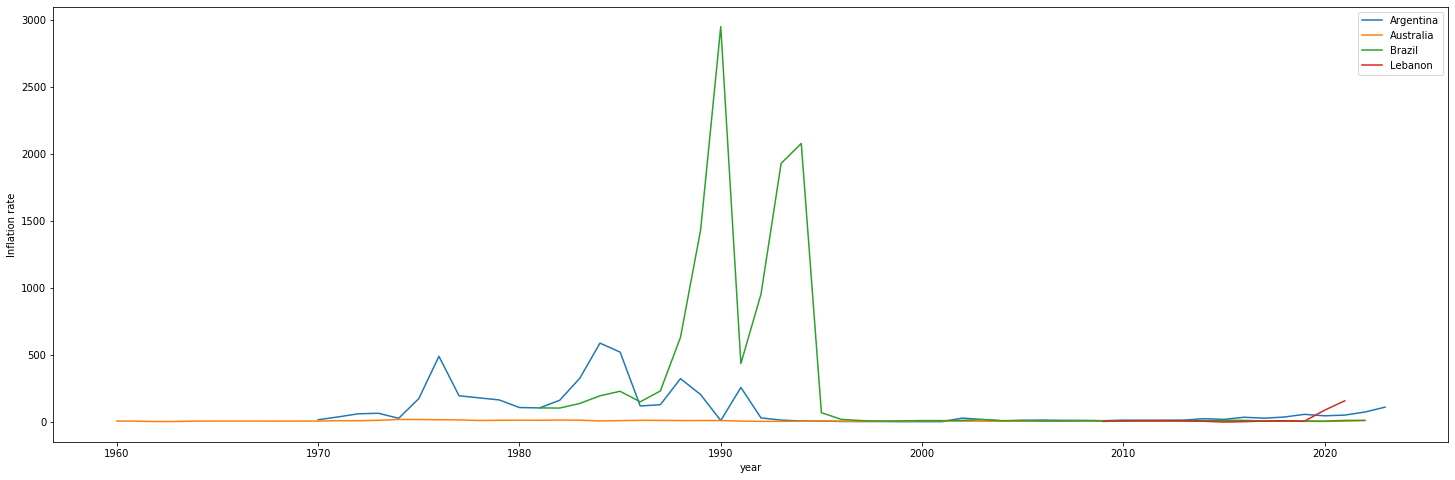

In [106]:
# au_inflation.plot(x = "year"
#                        y = "Consumer price index (2010=100)")



ax = ag_inflation.plot(kind = "line", x = "year", y = "Inflation, consumer prices (annual %)", figsize= (25,8), xlabel = "Year", ylabel = "Inflation rate") 

au_inflation.plot(kind = "line", x = "year", y = "Inflation, consumer prices (annual %)", ax = ax) 

br_inflation.plot(kind = "line", x = "year", y = "Inflation, consumer prices (annual %)", ax = ax)

lb_inflation.plot(kind = "line", x = "year", y = "Inflation, consumer prices (annual %)", ax = ax)

ax.legend(["Argentina","Australia", "Brazil", "Lebanon"])




# plt.show()

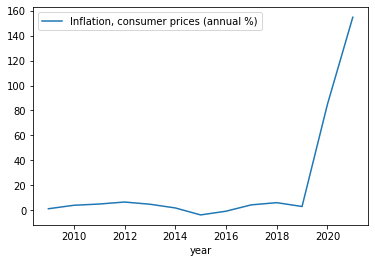

In [103]:
lb_inflation.plot(kind = "line", x = "year", y = "Inflation, consumer prices (annual %)")

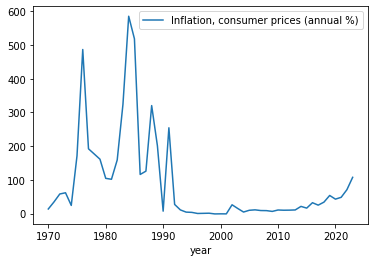

In [104]:
ag_inflation.plot(kind = "line", x = "year", y = "Inflation, consumer prices (annual %)")

# Scrap

In [12]:
for column in audf.columns:
    print(column)

year
Intentional homicides (per 100,000 people)
Internally displaced persons, new displacement associated with disasters (number of cases)
Voice and Accountability: Percentile Rank, Upper Bound of 90% Confidence Interval
Voice and Accountability: Estimate
High-technology exports (current US$)
Merchandise exports to low- and middle-income economies within region (% of total merchandise exports)
Merchandise exports to low- and middle-income economies in South Asia (% of total merchandise exports)
Merchandise exports to low- and middle-income economies in East Asia & Pacific (% of total merchandise exports)
Merchandise exports to economies in the Arab World (% of total merchandise exports)
ICT goods exports (% of total goods exports)
Export unit value index (2015 = 100)
Travel services (% of commercial service imports)
Import value index (2000 = 100)
Merchandise imports from low- and middle-income economies in Sub-Saharan Africa (% of total merchandise imports)
Merchandise imports from lo

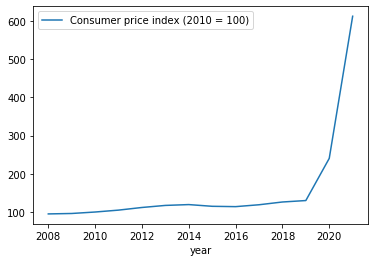

In [15]:
lb_inflation.plot(kind = "line", x = "year", y = "Inflation, consumer prices (annual %)")

plt.show()

In [107]:
ag_inflation

,year,"Inflation, consumer prices (annual %)"
0,1970,13.450000
1,1971,34.533333
2,1972,57.950000
3,1973,61.558333
4,1974,24.066667
5,1975,171.258333
6,1976,486.600000
7,1977,192.025000
8,1978,176.608333
9,1979,161.100000
